In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
imb_degrees = ["very_low", "low", "normal", "high", "very_high"]
df = pd.read_csv('../clustering/normal/clustering_acc.csv')
df

,Unnamed: 0,Method,R_e,A@e,RA@e,Run,n_clusters,algorithm,n_components,max info loss,gini,p value
0,0,RF,1,0.276667,1.000000,1,NaN,NaN,NaN,NaN,NaN,NaN
1,1,RF,2,0.476667,1.419580,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2,RF,3,0.553333,1.638554,1,NaN,NaN,NaN,NaN,NaN,NaN
3,3,RF,4,0.623333,1.903743,1,NaN,NaN,NaN,NaN,NaN,NaN
4,4,RF,5,0.670000,2.119403,1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
955,955,RF,6,0.693333,2.250000,1,NaN,NaN,NaN,NaN,NaN,NaN
956,956,RF,7,0.710000,2.361502,1,NaN,NaN,NaN,NaN,NaN,NaN
957,957,RF,8,0.733333,2.540909,1,NaN,NaN,NaN,NaN,NaN,NaN
958,958,RF,9,0.756667,2.740088,1,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df = pd.read_csv('https://www.kaggle.com/kannanaikkal/ecoli-uci-dataset/download/ecoli.csv')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 7, saw 2


In [4]:
df["Method"].unique()

array(['RF', 'KMeans', 'Birch', 'GMM', 'SPH', 'SPH+CPI'], dtype=object)

In [49]:
merged_df = pd.DataFrame()
for imb in imb_degrees:
    df = pd.read_csv(f'../clustering/{imb}/clustering_acc.csv')
    df["imbalance"] = imb
    merged_df = pd.concat([merged_df, df])
merged_df["n_clusters"] = merged_df.apply(lambda x: x["n_clusters"] if np.isnan(x["n_components"]) else x["n_components"], axis="columns")
merged_df[(merged_df["Method"] == "SPH") & (merged_df["imbalance"] == "normal") & (merged_df["R_e"] == 1)]["A@e"]

310    0.370000
320    0.370000
330    0.373333
340    0.373333
Name: A@e, dtype: float64

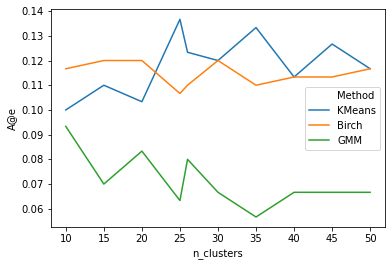

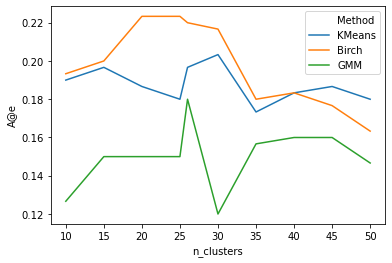

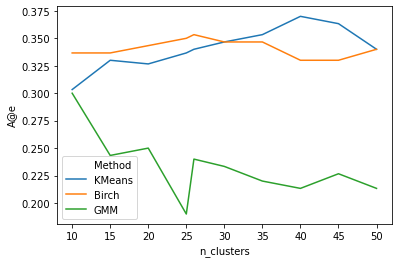

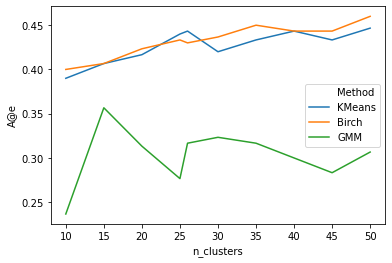

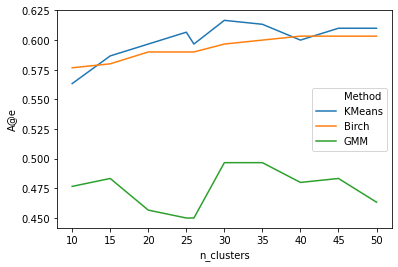

In [47]:
for imb in imb_degrees:
    sns.lineplot(data=merged_df[(merged_df["imbalance"] == imb) & (merged_df["Method"].isin(["KMeans", "Birch", "GMM"])) &(merged_df["R_e"].isin([1]))], hue="Method",x="n_clusters", y="A@e")
    plt.show()
    plt.close()

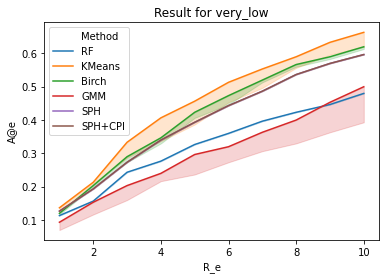

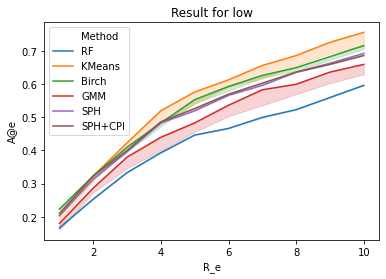

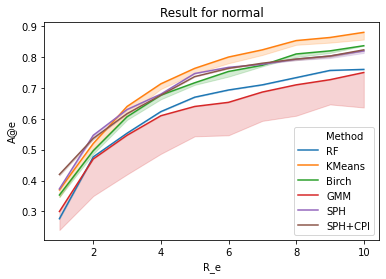

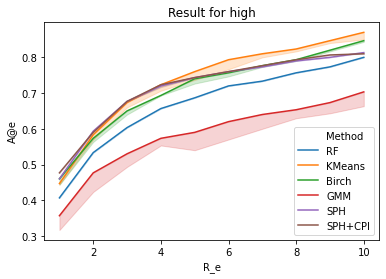

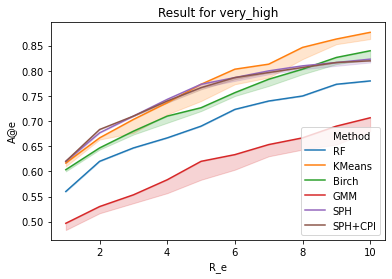

In [18]:
for imb in imb_degrees:
    imb_df = merged_df[merged_df["imbalance"] == imb]
    best_results = pd.DataFrame()
    for method in imb_df["Method"].unique():
        method_df = imb_df[imb_df["Method"] == method]
        method_df[]
    ax = sns.lineplot(data=merged_df[merged_df["imbalance"] == imb], x="R_e", y="A@e", hue="Method", estimator=np.max)
    ax.set_title(f"Result for {imb}")
    plt.show()
    plt.close()